In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
import streamlit as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# I Compréhension des données

In [2]:
data = pd.read_csv('offres.csv') #de notre bd  (test mtaa les modèles)

In [3]:
data1 = pd.read_csv('linkedin-jobs-noduplicates.csv') #mtaa webscraping(entrainement mtaa  les modèles)

In [4]:
data.head()

,id_offre,date_de_creation,description,intitule,nb_places,user_id,image,sessions_id_session,qrcode
0,1,2024-03-01 23:41:03.000000,A high-level programming language,Java Developper,2,2.0,https://www.actia.com/images/logo-actia.png,1.0,NaN
1,6,2024-03-03 18:47:14.000000,Creer des algorithmes d'apprentissage automatique,Ingenieur Data Science,2,4.0,/assets/vermegpng.png,1.0,NaN
2,18,2024-03-06 23:08:46.000000,Conception et developpement de logiciels embar...,Stage Ingénieur Systemes Embarques (1 an d'exp...,1,2.0,https://www.actia.com/images/logo-actia.png,1.0,NaN
3,20,2024-03-06 23:33:59.000000,Developpement d'une application web native,react js et react native,5,2.0,https://www.actia.com/images/logo-actia.png,1.0,http://api.qrserver.com/v1/create-qr-code/?dat...
4,22,2024-03-31 22:39:48.000000,Expérience dans le développement de firmwares ...,Stage Développeur Firmware (6 mois d'expérience),3,4.0,/assets/vermegpng.png,1.0,NaN


In [5]:
data1.head()

,Title,Speciality
0,Junior NodeJS/ReactJS Full-Stack Developer (H/F),DWM
1,Full Stack Developer,DWM
2,Front-End Developer TN,DWM
3,React Developer,DWM
4,Software Engineer - Tunisia,AUTRE


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_offre             43 non-null     int64  
 1   date_de_creation     7 non-null      object 
 2   description          43 non-null     object 
 3   intitule             43 non-null     object 
 4   nb_places            43 non-null     int64  
 5   user_id              39 non-null     float64
 6   image                7 non-null      object 
 7   sessions_id_session  7 non-null      float64
 8   qrcode               1 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ KB
None


In [7]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       117 non-null    object
 1   Speciality  117 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB
None


In [8]:
print(data.describe())

        id_offre  nb_places    user_id  sessions_id_session
count  43.000000  43.000000  39.000000                  7.0
mean   39.813953   2.302326  16.974359                  1.0
std    14.760397   1.753023   8.427671                  0.0
min     1.000000   0.000000   2.000000                  1.0
25%    30.500000   1.000000  12.000000                  1.0
50%    41.000000   2.000000  21.000000                  1.0
75%    51.500000   3.000000  23.000000                  1.0
max    62.000000   8.000000  24.000000                  1.0


In [9]:
print(data1.describe())

                                                   Title Speciality
count                                                117        117
unique                                               117          5
top     Junior NodeJS/ReactJS Full-Stack Developer (H/F)        DWM
freq                                                   1         62


In [10]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True) 

id_offre               0.000000
description            0.000000
intitule               0.000000
nb_places              0.000000
user_id                0.093023
date_de_creation       0.837209
image                  0.837209
sessions_id_session    0.837209
qrcode                 0.976744
dtype: float64

In [11]:
(data1.isna().sum()/data1.shape[0]).sort_values(ascending=True) 

Title         0.0
Speciality    0.0
dtype: float64

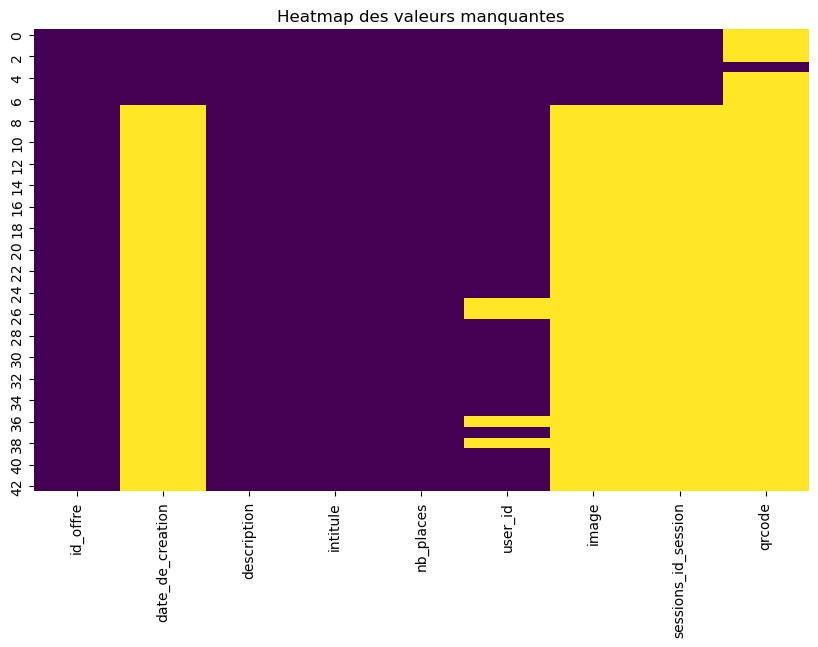

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

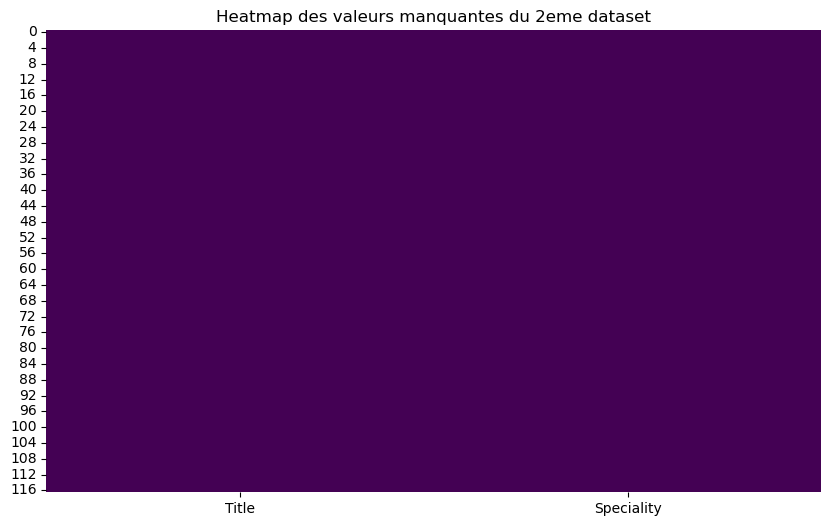

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(data1.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes du 2eme dataset')
plt.show()

# Prepartion des données

In [14]:
data['description'] = data['description'].str.lower()
data['intitule'] = data['intitule'].str.lower()

In [15]:
print(data.head())

   id_offre            date_de_creation  \
0         1  2024-03-01 23:41:03.000000   
1         6  2024-03-03 18:47:14.000000   
2        18  2024-03-06 23:08:46.000000   
3        20  2024-03-06 23:33:59.000000   
4        22  2024-03-31 22:39:48.000000   

                                         description  \
0                  a high-level programming language   
1  creer des algorithmes d'apprentissage automatique   
2  conception et developpement de logiciels embar...   
3         developpement d'une application web native   
4  expérience dans le développement de firmwares ...   

                                            intitule  nb_places  user_id  \
0                                    java developper          2      2.0   
1                             ingenieur data science          2      4.0   
2  stage ingénieur systemes embarques (1 an d'exp...          1      2.0   
3                           react js et react native          5      2.0   
4  stage développeur fir

In [16]:
# Sélectionner uniquement les colonnes 'description' et 'intitule'
data_selected = data.loc[:, ['description', 'intitule']]

In [17]:
print(data_selected.head())

                                         description  \
0                  a high-level programming language   
1  creer des algorithmes d'apprentissage automatique   
2  conception et developpement de logiciels embar...   
3         developpement d'une application web native   
4  expérience dans le développement de firmwares ...   

                                            intitule  
0                                    java developper  
1                             ingenieur data science  
2  stage ingénieur systemes embarques (1 an d'exp...  
3                           react js et react native  
4  stage développeur firmware (6 mois d'expérience)   


In [18]:
# Tri aléatoire des lignes
data_selected_random = data_selected.sample(frac=1)

In [19]:
print(data_selected_random)

                                          description  \
25  maîtrise de java, react.js, node.js et expérie...   
22  expérience requise en php, laravel, vue.js et ...   
7   participer au développement d'applications and...   
11  travailler sur des projets utilisant react.js,...   
6   gérer les déploiements cloud, la configuration...   
5   gestion des infrastructures cloud, automatisat...   
13  conception et développement d'applications ios...   
33  joignez-vous à notre équipe en tant qu'ingénie...   
20  participer à des projets utilisant vue.js, htm...   
30  nous sommes à la recherche d'un développeur fi...   
2   conception et developpement de logiciels embar...   
16  contribuer à des projets python, notamment dan...   
17  expérience avec react native, javascript et dé...   
26  conception et développement d'applications web...   
27   nous cherchons un analyste en science des don...   
38  nous recherchons un développeur spécialisé dan...   
1   creer des algorithmes d'app

In [20]:
# Remplacer les caractères spécifiques dans les colonnes 'description' et 'intitule'
data_selected['description'] = data_selected['description'].str.replace('é', 'e').str.replace('è', 'e').str.replace('à', 'a')
data_selected['intitule'] = data_selected['intitule'].str.replace('é', 'e').str.replace('è', 'e').str.replace('à', 'a')


In [21]:
# Supprimer les lignes avec la modalité "autre" dans la colonne "speciality"
print(data1['Speciality'].unique())
data1 = data1[data1['Speciality'] != 'AUTRE']

['DWM' 'AUTRE' 'BI&BD' 'ES' 'CL']


In [22]:
# Obtenir les différentes modalités de la colonne "speciality"
modalites_speciality = data1['Speciality'].unique()

# Afficher les modalités
print(modalites_speciality)

['DWM' 'BI&BD' 'ES' 'CL']


In [23]:
def determine_speciality(title):
    title_lower = title.lower()
    title_lower = re.sub(r'[^\w\s]', '', title_lower)
    keywords = {
        # Developpement web et mobile
        'DWM': ['react native', 'ios', 'swift', 'kotlin', 'mobile', 'android', 'flutter','java', 'web', 'fullstack', 'full stack', 'node.js','node js', 'express js', '.net', 'angular', 'dotnet', 'vue js', 'react', 'html', 'css', 'javascript', 'springboot', 'frontend', 'front-end', 'backend', 'back-end', 'php', 'symfony', 'laravel', 'wordpress'],
        # Dig data et bi
        'BI&BD': ['data scientist','power bi', 'ssis', 'ssrs', 'ssas', 'business intelligence', 'big data', 'sql', 'administrateur', 'oracle','python', 'machine learning', 'science', 'r', 'scientist','talend','excel','data mining'],
        # Embarque
        'ES': ['Automobile','embarque','embedded','cad', 'c++', 'c', 'autocad','iot','embarques','Embarque','IoT','électroniques','électronique','electronique'],
        # Cloud
        'CL': ['linux', 'devops', 'ip', 'cloud', 'terraform', 'grafana', 'apache airflow', 'securite','security'],
    }
    
    max_similarity = 0
    best_speciality = 'AUTRE'
    all_keywords = [' '.join(word_list) for word_list in keywords.values()]
    all_keywords.append(title_lower)
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(all_keywords)
   
    title_vector = vectors[-1]  
    for i, speciality_vector in enumerate(vectors[:-1]):  
        similarity = np.dot(speciality_vector, title_vector.T).toarray()[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_speciality = list(keywords.keys())[i]    
    return best_speciality

In [24]:
def determine_speciality_from_title_and_description(title, description):
    text = title.lower() + ' ' + description.lower()
    return determine_speciality(text)

In [25]:
data_selected_random['Speciality'] = data_selected_random.apply(lambda row: determine_speciality_from_title_and_description(row['intitule'], row['description']), axis=1)

In [26]:
print(data_selected_random.head())

                                          description  \
25  maîtrise de java, react.js, node.js et expérie...   
22  expérience requise en php, laravel, vue.js et ...   
7   participer au développement d'applications and...   
11  travailler sur des projets utilisant react.js,...   
6   gérer les déploiements cloud, la configuration...   

                                             intitule Speciality  
25  stage développeur full stack (1 an d'expérience)         DWM  
22      stage développeur web php (1 an d'expérience)        DWM  
7   stage développeur java android (6 mois d'expér...        DWM  
11   stage développeur react.js (6 mois d'expérience)        DWM  
6    stage administrateur cloud (6 mois d'expérience)         CL  


In [27]:
print(data_selected_random['Speciality'].unique())

['DWM' 'CL' 'AUTRE' 'ES' 'BI&BD']


In [28]:
data_selected_random = data_selected_random[data_selected_random['Speciality'] != 'AUTRE']

In [29]:
print(data_selected_random['Speciality'].unique())

['DWM' 'CL' 'ES' 'BI&BD']


In [30]:
# Concaténer les colonnes "intitule" et "description"
data_selected_random['Title'] = data_selected_random['intitule'] + ' ' + data_selected_random['description']

In [31]:
data_selected_random.head()

,description,intitule,Speciality,Title
25,"maîtrise de java, react.js, node.js et expérie...",stage développeur full stack (1 an d'expérience),DWM,stage développeur full stack (1 an d'expérienc...
22,"expérience requise en php, laravel, vue.js et ...",stage développeur web php (1 an d'expérience),DWM,stage développeur web php (1 an d'expérience) ...
7,participer au développement d'applications and...,stage développeur java android (6 mois d'expér...,DWM,stage développeur java android (6 mois d'expér...
11,"travailler sur des projets utilisant react.js,...",stage développeur react.js (6 mois d'expérience),DWM,stage développeur react.js (6 mois d'expérienc...
6,"gérer les déploiements cloud, la configuration...",stage administrateur cloud (6 mois d'expérience),CL,stage administrateur cloud (6 mois d'expérienc...


In [32]:
# Sélectionner uniquement les colonnes 'Title' et 'Speciality'
data_selected_random = data_selected_random.loc[:, ['Title', 'Speciality']]

# Afficher les premières lignes du DataFrame pour vérification
print(data_selected_random.head())

                                                Title Speciality
25  stage développeur full stack (1 an d'expérienc...        DWM
22  stage développeur web php (1 an d'expérience) ...        DWM
7   stage développeur java android (6 mois d'expér...        DWM
11  stage développeur react.js (6 mois d'expérienc...        DWM
6   stage administrateur cloud (6 mois d'expérienc...         CL


In [33]:
data1.head()

,Title,Speciality
0,Junior NodeJS/ReactJS Full-Stack Developer (H/F),DWM
1,Full Stack Developer,DWM
2,Front-End Developer TN,DWM
3,React Developer,DWM
5,Java Developer TN,DWM


In [34]:
data_selected_random.head()

,Title,Speciality
25,stage développeur full stack (1 an d'expérienc...,DWM
22,stage développeur web php (1 an d'expérience) ...,DWM
7,stage développeur java android (6 mois d'expér...,DWM
11,stage développeur react.js (6 mois d'expérienc...,DWM
6,stage administrateur cloud (6 mois d'expérienc...,CL


In [35]:
# Diviser les données en ensembles d'entraînement et de test pour data1
X_train, X_test, y_train, y_test = train_test_split(data1['Title'], data1['Speciality'], test_size=0.2, random_state=42)

# Utiliser data_selected_random comme ensemble de test
X_test_selected_random = data_selected_random['Title']
y_test_selected_random = data_selected_random['Speciality']

# III Modélisation

In [36]:
# Créer le pipeline avec TfidfVectorizer et KNeighborsClassifier
pipeline_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

# Entraîner le modèle sur data1
pipeline_knn.fit(data1['Title'], data1['Speciality'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

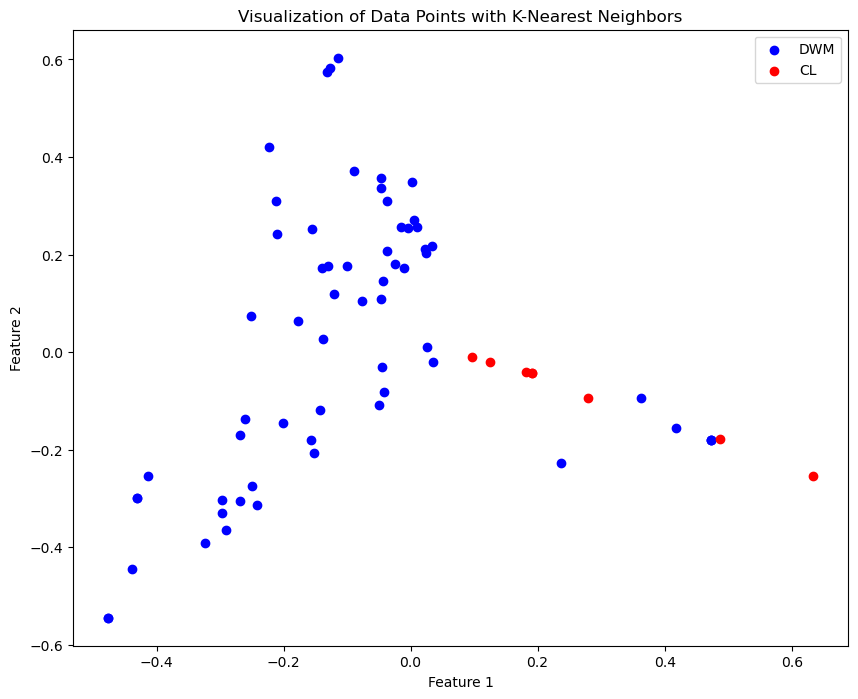

In [46]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Fit the K-nearest neighbors classifier on the data
pipeline_knn.fit(data1['Title'], data1['Speciality'])

# Get the predicted labels for each data point
predicted_labels = pipeline_knn.predict(data1['Title'])

# Define colors for each class
color_dict = {'DWM': 'blue', 'CL': 'red'}  # Adjust colors based on your actual classes

# Plot the data points
plt.figure(figsize=(10, 8))
for label, color in color_dict.items():
    indices = data1['Speciality'] == label
    plt.scatter(tfidf_matrix_2d[indices, 0], tfidf_matrix_2d[indices, 1], c=color, label=label)

plt.title('Visualization of Data Points with K-Nearest Neighbors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [37]:
# Créer le pipeline avec TfidfVectorizer et AdaBoostClassifier
pipeline_adaboost = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', AdaBoostClassifier())
])

# Entraîner le modèle sur data1
pipeline_adaboost.fit(data1['Title'], data1['Speciality'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

In [38]:
# Créer le pipeline avec TfidfVectorizer et LogisticRegression
pipeline_logistic = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Entraîner le modèle sur data1
pipeline_logistic.fit(data1['Title'], data1['Speciality'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [39]:
# Créer le pipeline avec TfidfVectorizer et RandomForestClassifier
pipeline_random_forest = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Entraîner le modèle sur data1
pipeline_random_forest.fit(data1['Title'], data1['Speciality'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

# IV Evaluation

In [41]:
# Créer une liste des noms de modèles et de leurs pipelines correspondants
models = {
    'k-NN': pipeline_knn,
    'AdaBoost': pipeline_adaboost,
    'Logistic Regression': pipeline_logistic,
    'Random Forest': pipeline_random_forest
}

# Dictionnaire pour stocker les précisions de chaque modèle
accuracies = {}

# Calculer l'exactitude de chaque modèle sur les données de test
for name, model in models.items():
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    # Prédire les étiquettes de classe sur les données de test
    y_pred = model.predict(X_test)
    # Calculer l'exactitude
    accuracy = accuracy_score(y_test, y_pred)
    # Stocker l'exactitude dans le dictionnaire
    accuracies[name] = accuracy

# Trier les modèles par exactitude décroissante
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Afficher les résultats
for name, accuracy in sorted_accuracies:
    print(f'{name}: Accuracy = {accuracy:.4f}')


Random Forest: Accuracy = 0.8421
k-NN: Accuracy = 0.7895
Logistic Regression: Accuracy = 0.7368
AdaBoost: Accuracy = 0.6842


In [49]:
from sklearn.metrics import classification_report, accuracy_score

# Évaluer le modèle sur data_selected_random
accuracy_knn = pipeline_knn.score(data_selected_random['Title'], data_selected_random['Speciality'])
print("Précision du modèle k-NN :", accuracy_knn)

# Obtenir les prédictions du modèle k-NN
y_pred_knn = pipeline_knn.predict(data_selected_random['Title'])

# Afficher le rapport de classification du modèle k-NN
report_knn = classification_report(data_selected_random['Speciality'], y_pred_knn)
print("Rapport de classification du modèle k-NN :\n", report_knn)

# Évaluer le modèle AdaBoost sur data_selected_random
accuracy_adaboost = pipeline_adaboost.score(data_selected_random['Title'], data_selected_random['Speciality'])
print("Précision du modèle AdaBoost :", accuracy_adaboost)

# Obtenir les prédictions du modèle AdaBoost
y_pred_adaboost = pipeline_adaboost.predict(data_selected_random['Title'])

# Afficher le rapport de classification du modèle AdaBoost
report_adaboost = classification_report(data_selected_random['Speciality'], y_pred_adaboost)
print("Rapport de classification du modèle AdaBoost :\n", report_adaboost)

# Évaluer le modèle de régression logistique sur data_selected_random
accuracy_logistic = pipeline_logistic.score(data_selected_random['Title'], data_selected_random['Speciality'])
print("Précision du modèle de régression logistique :", accuracy_logistic)

# Obtenir les prédictions du modèle de régression logistique
y_pred_logistic = pipeline_logistic.predict(data_selected_random['Title'])

# Afficher le rapport de classification du modèle de régression logistique
report_logistic = classification_report(data_selected_random['Speciality'], y_pred_logistic)
print("Rapport de classification du modèle de régression logistique :\n", report_logistic)

# Évaluer le modèle de Random Forest sur data_selected_random
accuracy_random_forest = pipeline_random_forest.score(data_selected_random['Title'], data_selected_random['Speciality'])
print("Précision du modèle de Random Forest :", accuracy_random_forest)

# Obtenir les prédictions du modèle de Random Forest
y_pred_random_forest = pipeline_random_forest.predict(data_selected_random['Title'])

# Afficher le rapport de classification du modèle de Random Forest
report_random_forest = classification_report(data_selected_random['Speciality'], y_pred_random_forest)
print("Rapport de classification du modèle de Random Forest :\n", report_random_forest)


Précision du modèle k-NN : 0.8157894736842105
Rapport de classification du modèle k-NN :
               precision    recall  f1-score   support

       BI&BD       1.00      0.82      0.90        11
          CL       0.75      1.00      0.86         3
         DWM       0.76      1.00      0.86        19
          ES       0.00      0.00      0.00         5

    accuracy                           0.82        38
   macro avg       0.63      0.70      0.66        38
weighted avg       0.73      0.82      0.76        38

Précision du modèle AdaBoost : 0.5263157894736842
Rapport de classification du modèle AdaBoost :
               precision    recall  f1-score   support

       BI&BD       0.00      0.00      0.00        11
          CL       0.50      0.33      0.40         3
         DWM       0.53      1.00      0.69        19
          ES       0.00      0.00      0.00         5

    accuracy                           0.53        38
   macro avg       0.26      0.33      0.27        

C:\Users\MSII\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSII\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSII\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSII\anaconda3\lib\site-packages\sklearn\metrics\

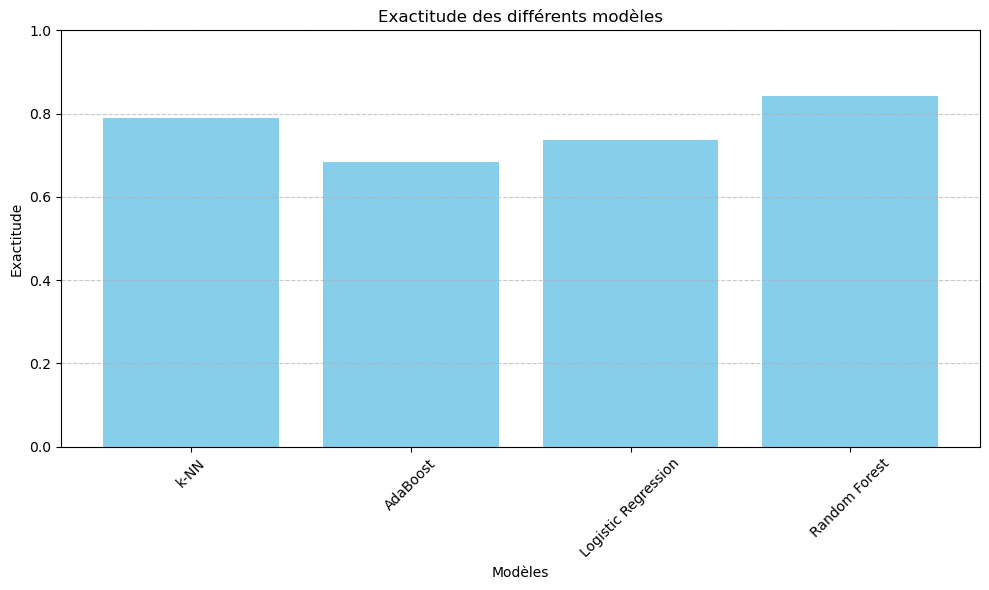

In [42]:
# Créer une liste des noms de modèles et de leurs pipelines correspondants
models = {
    'k-NN': pipeline_knn,
    'AdaBoost': pipeline_adaboost,
    'Logistic Regression': pipeline_logistic,
    'Random Forest': pipeline_random_forest
}

# Dictionnaire pour stocker les précisions de chaque modèle
accuracies = {}

# Calculer l'exactitude de chaque modèle sur les données de test
for name, model in models.items():
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    # Prédire les étiquettes de classe sur les données de test
    y_pred = model.predict(X_test)
    # Calculer l'exactitude
    accuracy = accuracy_score(y_test, y_pred)
    # Stocker l'exactitude dans le dictionnaire
    accuracies[name] = accuracy

# Créer une liste de noms de modèles et d'exactitudes correspondantes
model_names = list(accuracies.keys())
accuracies_values = list(accuracies.values())

# Tracer les barres pour chaque modèle
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies_values, color='skyblue')

# Ajouter des titres et des étiquettes
plt.xlabel('Modèles')
plt.ylabel('Exactitude')
plt.title('Exactitude des différents modèles')
plt.ylim(0, 1)  # Limiter l'axe y entre 0 et 1 pour l'exactitude
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour une meilleure lisibilité

# Afficher le graphique
plt.tight_layout()  # Ajuster automatiquement les espaces pour éviter la superposition
plt.show()


# V Déploiement

In [43]:
# Entraîner tous les modèles sur les données d'entraînement
# Remplacez X_train et y_train par vos données d'entraînement
# Assurez-vous également d'avoir initialisé et entraîné tous les pipelines avant cela
models = {
    'k-NN': pipeline_knn,
    'AdaBoost': pipeline_adaboost,
    'Logistic Regression': pipeline_logistic,
    'Random Forest': pipeline_random_forest
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Choisir le modèle avec la meilleure exactitude
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

# Sauvegarder le modèle dans un fichier
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Charger le modèle à partir du fichier
def load_model():
    with open('best_model.pkl', 'rb') as f:
        model = pickle.load(f)
    return model

# Utiliser le modèle pour faire des prédictions avec Streamlit
intitule = st.text_input("Intitulé de l'offre d'emploi", "")
description = st.text_area("Description de l'offre d'emploi", "")

if intitule.strip() == '' or description.strip() == '':
    st.error("Veuillez entrer l'intitulé et la description de l'offre d'emploi.")
else:
    intitule_description = intitule + ' ' + description
    model = load_model()
    prediction = model.predict([intitule_description])
    st.markdown(f"<p style='font-size:24px; font-weight:bold;'>La classe prédite pour cette offre d'emploi est : {prediction[0]}</p>", unsafe_allow_html=True)


2024-05-09 02:55:56.671 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-05-09 02:55:57.038 
  command:

    streamlit run C:\Users\MSII\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
